  ### Design a neural network for binary class classification.

In [90]:
# Load the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv")
dataset

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [91]:
dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
dataset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [92]:
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female': 1})
dataset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [105]:
# Checking null values
print(dataset.isnull().sum())

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64


In [106]:
dataset.Age = dataset.Age.fillna(dataset.Age.mean())
dataset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


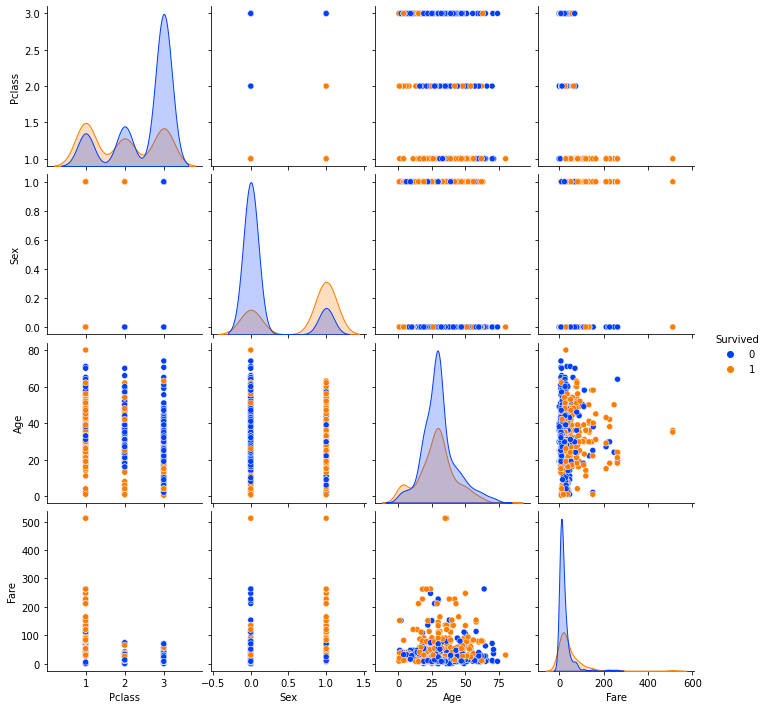

In [107]:
# Pairplot to visualize relationships between variables
sns.pairplot(dataset, hue='Survived', palette='bright')
plt.show()

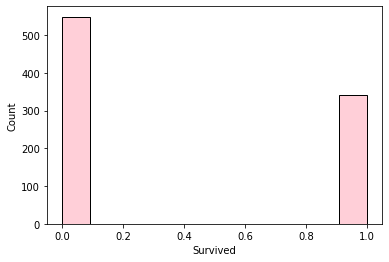

In [108]:
# Histogram to visualise the target
sns.histplot(dataset['Survived'], color='pink')
plt.show()

In [109]:
# Encode the label
le = LabelEncoder()
dataset['Survived'] = le.fit_transform(dataset['Survived'])
dataset

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.000000,7.2500,0
1,1,1,38.000000,71.2833,1
2,3,1,26.000000,7.9250,1
3,1,1,35.000000,53.1000,1
4,3,0,35.000000,8.0500,0
...,...,...,...,...,...
886,2,0,27.000000,13.0000,0
887,1,1,19.000000,30.0000,1
888,3,1,29.699118,23.4500,0
889,1,0,26.000000,30.0000,1


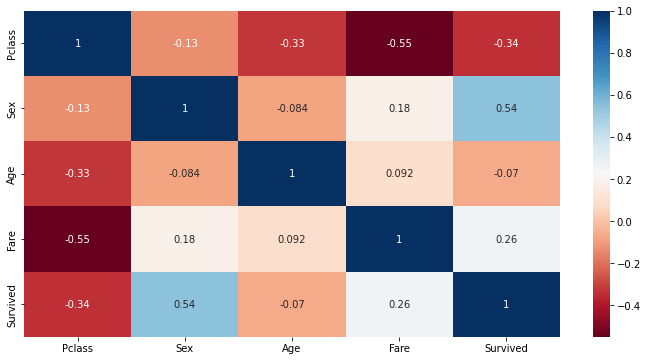

In [110]:
# Correlation matrix for the dataset
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

In [111]:
# Split the data into features and target
X = dataset.drop('Survived', axis='columns')
y = dataset['Survived']

In [112]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# early stopping callback
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X, y, callbacks=es, epochs=100, batch_size=10, validation_split=0.3, shuffle=True, verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                80        
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
63/63 [==============================] - 2s 12ms/step - loss: 5.9322 - accuracy: 0.3949 - val_loss: 2.7443 - val_accuracy: 0.3582
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 1.3754 - accuracy: 0.3531 - val_loss: 0.7821 - val_accuracy: 0.4142
Epoch 3/100
63/63 [==============================] - 0s 7ms/step - loss: 0.7228 - accuracy: 0.5554 - val_loss: 0.6463 - val_accuracy: 0.6642
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6437 - val_loss: 0.5974 - val_accuracy: 0.6791
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6399 - accuracy: 0.6533 - val_loss: 0.5767 - val_accuracy: 0.7052
Epoch 6/100
63/63 [==============================] - 0s 6ms/step - loss: 0.6173 - accuracy: 0.6645 - val_loss: 0.6180 - val_accuracy: 0.6604
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.6645 - val_loss: 0.5693 - val_accuracy: 0.6791
Epoch 8/100


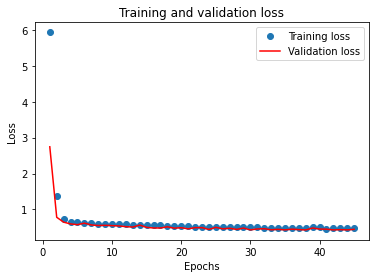

In [113]:
history_dict = history.history

# loss
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values,'o', label='Training loss')
plt.plot(epochs, val_loss_values, "Red", label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

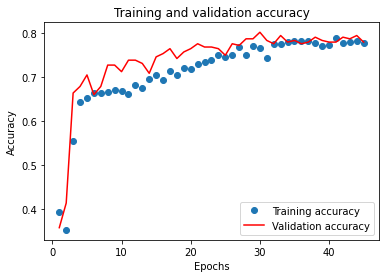

0.8022388219833374

In [114]:
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc,'o', label='Training accuracy')
plt.plot(epochs, val_acc, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

np.max(val_acc)

In [115]:
y_pred = np.round(model.predict(X), 0)

# Evaluation Metrics
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
cf = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cf)
cr = classification_report(y, y_pred)
print("Classification Report:\n", cr)

28/28 [==============================] - 0s 2ms/step
Accuracy: 0.7845117845117845
Confusion Matrix:
 [[482  67]
 [125 217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       549
           1       0.76      0.63      0.69       342

    accuracy                           0.78       891
   macro avg       0.78      0.76      0.76       891
weighted avg       0.78      0.78      0.78       891

